In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Data\Merged_BIR_CLS.csv"

In [3]:
df = pd.read_csv(file_path)
print(df.head())

    BASE_DATE                                      BOND_NAME BOND_CODE  \
0  28/04/2023  ISLAM IMTN (SUB) 3.75% 26.03.2030 - Tranche 2  VN200060   
1  28/04/2023      DANGA IMTN 2.320% 25.01.2024 - Tranche 10  VG210001   
2  28/04/2023                    UEMS IMTN 4.000% 16.02.2024  VG210012   
3  28/04/2023     CIMB THAI 3.900% 11.07.2031 - Tranche No 5  PN210003   
4  28/04/2023             CIMB 4.880% 13.09.2029 - Tranche 4  PO180006   

                             ISSUER_NAME  \
0             Bank Islam Malaysia Berhad   
1                   Danga Capital Berhad   
2                     UEM Sunrise Berhad   
3  CIMB Thai Bank Public Company Limited   
4             CIMB Group Holdings Berhad   

                                       FACILITY_NAME  OUTSTANDING_AMOUNT  \
0  BANK ISLAM RM10.0 BILLION SUKUK MURABAHAH PROG...        4.000000e+08   
1         DANGA RM10.0B ISLAMIC SECURITIES PROGRAMME        5.000000e+08   
2  UEMS RM2.0 BILLION 7 YEARS ICP & 30 YEARS IMTN...        2.

In [4]:
print(list(df.columns))

['BASE_DATE', 'BOND_NAME', 'BOND_CODE', 'ISSUER_NAME', 'FACILITY_NAME', 'OUTSTANDING_AMOUNT', 'TRADE_RECENCY', 'TRADE_FREQUENCY', 'TRADE_TURNOVER', 'COMPOSITE_LIQUIDITY_SCORE', 'BASE_DATE_1', 'PROD_CODE', 'BOND_CODE_1', 'NOTCH_VARIANCE']


In [5]:
print(df.shape)

(72466, 14)


# Data Cleaning

### Remove unnecessary columns

In [6]:
df = df.drop(["BASE_DATE_1", "BOND_CODE_1"], axis = 1)

### Rearrange for cleaner dataframe

In [7]:
df = df[["BASE_DATE", "BOND_CODE", "PROD_CODE", "BOND_NAME", "FACILITY_NAME", "ISSUER_NAME", "OUTSTANDING_AMOUNT", "TRADE_RECENCY", "TRADE_FREQUENCY", "TRADE_TURNOVER", "COMPOSITE_LIQUIDITY_SCORE", "NOTCH_VARIANCE"]]

### Remove duplicate rows

In [8]:
df.drop_duplicates()

,BASE_DATE,BOND_CODE,PROD_CODE,BOND_NAME,FACILITY_NAME,ISSUER_NAME,OUTSTANDING_AMOUNT,TRADE_RECENCY,TRADE_FREQUENCY,TRADE_TURNOVER,COMPOSITE_LIQUIDITY_SCORE,NOTCH_VARIANCE
0,28/04/2023,VN200060,VN20006026032030,ISLAM IMTN (SUB) 3.75% 26.03.2030 - Tranche 2,BANK ISLAM RM10.0 BILLION SUKUK MURABAHAH PROG...,Bank Islam Malaysia Berhad,4.000000e+08,4,1,4,3.00000,-1
1,28/04/2023,VG210001,VG21000125012024,DANGA IMTN 2.320% 25.01.2024 - Tranche 10,DANGA RM10.0B ISLAMIC SECURITIES PROGRAMME,Danga Capital Berhad,5.000000e+08,4,1,5,3.33333,0
2,28/04/2023,VG210012,VG21001216022024,UEMS IMTN 4.000% 16.02.2024,UEMS RM2.0 BILLION 7 YEARS ICP & 30 YEARS IMTN...,UEM Sunrise Berhad,2.300000e+08,4,1,5,3.33333,2
3,28/04/2023,PN210003,PN21000311072031,CIMB THAI 3.900% 11.07.2031 - Tranche No 5,CIMB THAI RM2.0B SUBORDINATED DEBT PROGRAMME,CIMB Thai Bank Public Company Limited,6.600000e+08,4,1,1,2.00000,0
4,28/04/2023,PO180006,PO18000613092029,CIMB 4.880% 13.09.2029 - Tranche 4,CIMBGH RM10.0B TIER 2 SUBORDINATED DEBT PROGRAMME,CIMB Group Holdings Berhad,1.200000e+09,5,1,2,2.66667,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
72461,28/04/2022,VS200164,VS20016410082035,TENAGA IMTN 3.250% 10.08.2035,TNB RM10.0 BILLION IMTN SUKUK WAKALAH,Tenaga Nasional Berhad,7.500000e+08,4,2,2,2.66667,0
72462,28/04/2022,UH190356,UH19035628112023,MERCEDES MTN 1461D 28.11.2023,Medium Term Notes (MTN) Programme (MTN Program...,Mercedes-Benz Services Malaysia Sdn Berhad,2.000000e+08,4,1,4,3.00000,0
72463,28/04/2022,VG190296,VG19029623122022,AZRB CAPITAL IMTN 4.700% 23.12.2022,AZRB CAPITAL RM535.0 MILLION 12-YEARS SUKUK MU...,AZRB Capital Sdn Berhad,1.000000e+08,4,1,3,2.66667,1
72464,28/04/2022,VK190106,VK19010619062026,SCC IMTN 4.450% 19.06.2026,SCC RM3.5B SUKUK MUSHARAKAH PROGRAMMES,Sabah Credit Corporation,7.000000e+07,5,1,5,3.66667,0


### Reverse sort values from oldest to latest

In [9]:
df.sort_values(by = ["BASE_DATE"], ascending = True, inplace = True)
print(df.head(5))

        BASE_DATE BOND_CODE         PROD_CODE  \
13848  01/03/2023  UZ190051  UZ19005130112117   
13778  01/03/2023  UG200188  UG20018818092023   
13777  01/03/2023  VN190285  VN19028512122029   
13776  01/03/2023  VG200194  VG20019421092023   
13775  01/03/2023  UN190345  UN19034508112029   

                                           BOND_NAME  \
13848  HLFG Perpetual Capital Securities (Tranche 2)   
13778    SWIRL ABSMTN 1095D 18.9.2023 (SN Tranche 3)   
13777               DRB-HICOM IMTN 5.100% 12.12.2029   
13776     UEMS IMTN 3.900% 21.09.2023 - Issue No. 12   
13775  GENTING RMTN MTN 3653D 08.11.2029 - Tranche 1   

                                           FACILITY_NAME  \
13848          HLFG ADDITIONAL TIER 1 CAPITAL SECURITIES   
13778  SWIRL ASSETS - MEDIUM TERM NOTES PROGRAMME (SE...   
13777         DRB-HICOM RM3.5 BILLION IMTN SUKUK WAKALAH   
13776                         UEMS RM2.0B IMTN PROGRAMME   
13775                 GENTING RMTN RM10.0B MTN PROGRAMME   

       

### Change "BASE_DATE" type to datetime object to sort properly 

In [10]:
df["BASE_DATE"] = pd.to_datetime(df["BASE_DATE"], format = '%d/%m/%Y')
df.sort_values(by = ["BASE_DATE"], ascending = True, inplace = True)
print(df)

       BASE_DATE BOND_CODE         PROD_CODE  \
72461 2022-04-28  VS200164  VS20016410082035   
72206 2022-04-28  PN200010  PN20001012112030   
72296 2022-04-28  VU120016  VU12001612012029   
72297 2022-04-28  VK220170  VK22017006042029   
72298 2022-04-28  VN220058  VN22005828012032   
...          ...       ...               ...   
353   2023-04-28  VI200010  VI20001021022025   
354   2023-04-28  VS200011  VS20001121022035   
335   2023-04-28  UN200153  UN20015302082030   
313   2023-04-28  VU130337  VU13033717122030   
52    2023-04-28  VN180337  VN18033724112028   

                                               BOND_NAME  \
72461                      TENAGA IMTN 3.250% 10.08.2035   
72206                 CIMB 3.150% 12.11.2030 - Tranche 6   
72296  PLUS BERHAD IMTN 4.960% 12.01.2029 - Series 1 ...   
72297        MMC PORT IMTN 4.660% 06.04.2029 (Tranche 2)   
72298          DIALOG SENIOR SUKUK WAKALAH TRANCHE NO. 2   
...                                                  ...   
353

# Exploratory Data Analysis

### Dataset summary

In [11]:
df.describe()

,OUTSTANDING_AMOUNT,TRADE_RECENCY,TRADE_FREQUENCY,TRADE_TURNOVER,COMPOSITE_LIQUIDITY_SCORE,NOTCH_VARIANCE
count,7.246600e+04,72466.000000,72466.000000,72466.000000,72466.000000,72466.000000
mean,4.481590e+08,4.378550,1.206041,3.331493,2.972028,0.234041
std,4.629628e+08,0.485313,0.493225,1.492347,0.582432,1.459415
min,0.000000e+00,3.000000,1.000000,1.000000,1.666670,-6.000000
25%,1.250000e+08,4.000000,1.000000,2.000000,2.333330,-1.000000
50%,3.000000e+08,4.000000,1.000000,4.000000,3.000000,0.000000
75%,5.500000e+08,5.000000,1.000000,5.000000,3.333330,1.000000
max,3.000000e+09,5.000000,5.000000,5.000000,5.000000,6.000000


### Dataset shape

In [12]:
df.shape

(72466, 12)

### Dataset general info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72466 entries, 72461 to 52
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BASE_DATE                  72466 non-null  datetime64[ns]
 1   BOND_CODE                  72466 non-null  object        
 2   PROD_CODE                  72466 non-null  object        
 3   BOND_NAME                  72466 non-null  object        
 4   FACILITY_NAME              72466 non-null  object        
 5   ISSUER_NAME                72466 non-null  object        
 6   OUTSTANDING_AMOUNT         72466 non-null  float64       
 7   TRADE_RECENCY              72466 non-null  int64         
 8   TRADE_FREQUENCY            72466 non-null  int64         
 9   TRADE_TURNOVER             72466 non-null  int64         
 10  COMPOSITE_LIQUIDITY_SCORE  72466 non-null  float64       
 11  NOTCH_VARIANCE             72466 non-null  int64         
dtypes: 

### Dependant variable : Notch Variance

In [14]:
df.NOTCH_VARIANCE.unique()

array([ 0, -1,  2,  1, -3,  4,  3, -2,  5, -4, -5, -6,  6], dtype=int64)

In [15]:
df.NOTCH_VARIANCE.value_counts()

 0    29237
-1    13294
 1    10354
 2     7608
 3     4162
-2     3835
-3     2148
 4     1458
 5      181
-4      114
 6       38
-5       25
-6       12
Name: NOTCH_VARIANCE, dtype: int64

### Dependant variable : Composite Liquidity Score

In [16]:
df.COMPOSITE_LIQUIDITY_SCORE.unique()

array([2.66667, 2.33333, 2.     , 3.33333, 3.     , 4.     , 3.66667,
       4.66667, 4.33333, 5.     , 1.66667])

In [17]:
df.COMPOSITE_LIQUIDITY_SCORE.value_counts()

3.33333    18053
3.00000    12803
2.66667    10580
2.33333     9945
3.66667     8931
2.00000     8182
4.00000     2956
4.33333      909
4.66667       86
5.00000       17
1.66667        4
Name: COMPOSITE_LIQUIDITY_SCORE, dtype: int64

### Find correlation of variables, no dropping dependant variables

Text(0.5, 1.0, 'Correlation Heatmap')

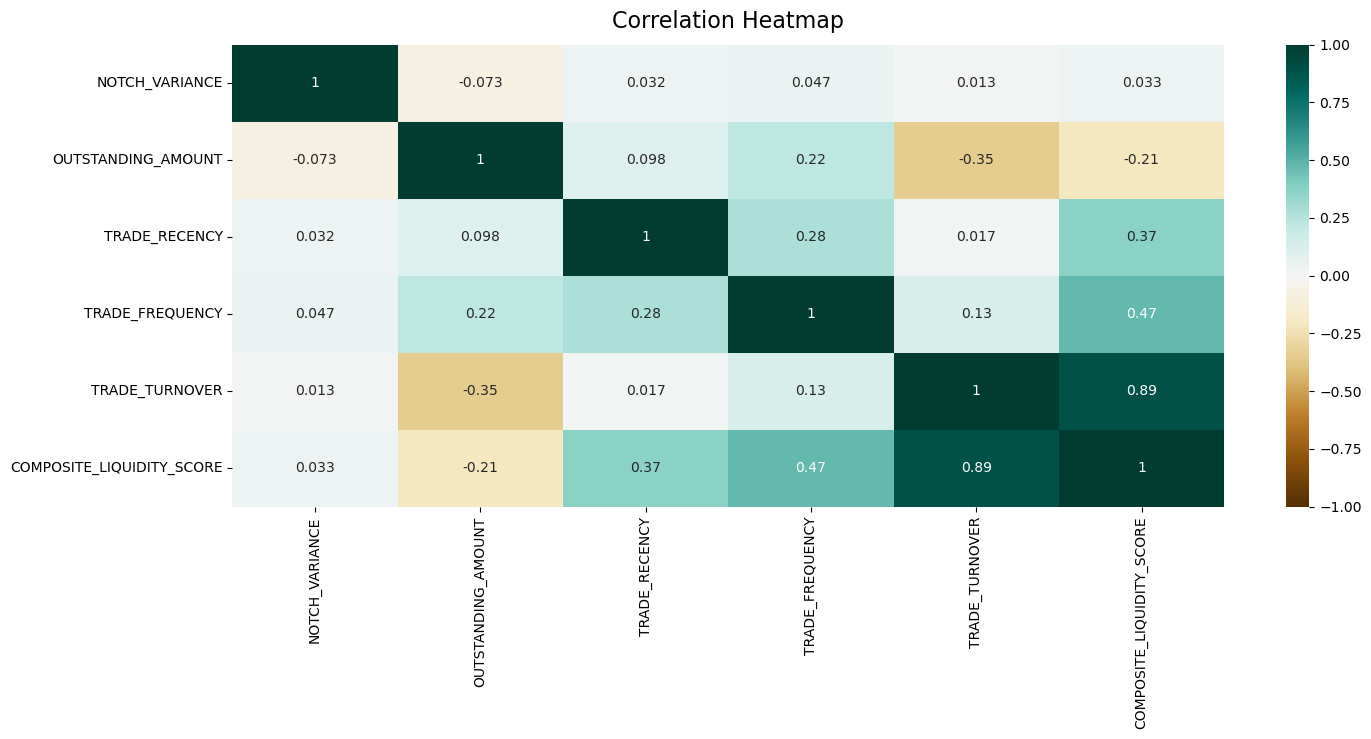

In [18]:
plt.figure(figsize = (16, 6))
heatmap = sns.heatmap(df[["NOTCH_VARIANCE", "OUTSTANDING_AMOUNT", "TRADE_RECENCY", "TRADE_FREQUENCY", "TRADE_TURNOVER", "COMPOSITE_LIQUIDITY_SCORE"]].corr(), vmin = -1, vmax = 1, annot = True, cmap = "BrBG")
heatmap.set_title("Correlation Heatmap", fontdict= {
    "fontsize" : 16
}, pad = 12)

The notch variance does not show a strong correlation with the composite liquidity score 

**keep in note that :
    * lower notch variance means that the BIR is better than credit rating
    * higher notch variance means that the BIR is worse than credit rating**


*Observe that there is a strong positive correlation between notch variance and outstanding amount,
the higher the oustanding amount, the higher the notch_variance (dated)

*Meaning that when the bond is recently introduced in the primary market with high oustanding amount, the price of bonds will be much closer with the credit rating, which makes sense.(dated)

### Boxplots

Text(0.5, 1.0, 'Boxplot of Notch Variance and Composite Liquidity Score')

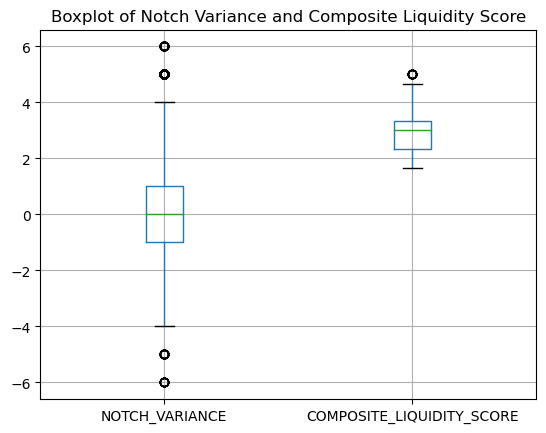

In [19]:
boxplot = df.boxplot(column = ["NOTCH_VARIANCE", "COMPOSITE_LIQUIDITY_SCORE"])
plt.title("Boxplot of Notch Variance and Composite Liquidity Score")

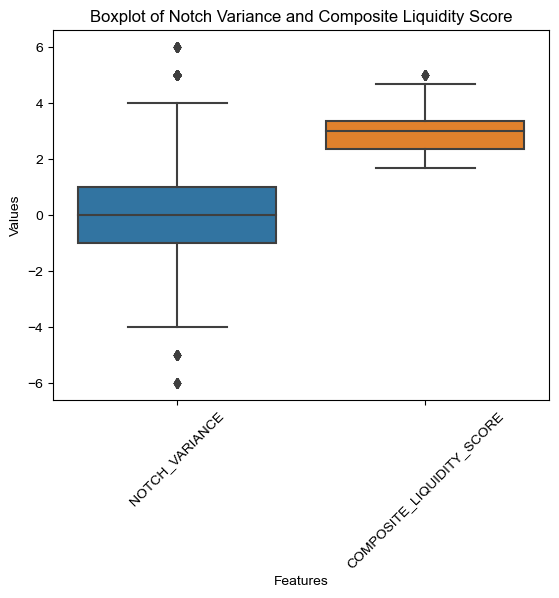

In [20]:
boxplot_sns = sns.boxplot(data = df[["NOTCH_VARIANCE", "COMPOSITE_LIQUIDITY_SCORE"]])
plt.title("Boxplot of Notch Variance and Composite Liquidity Score")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation = 45)
sns.set_style("whitegrid")

There are no negative value for notch variance

### KDE plot

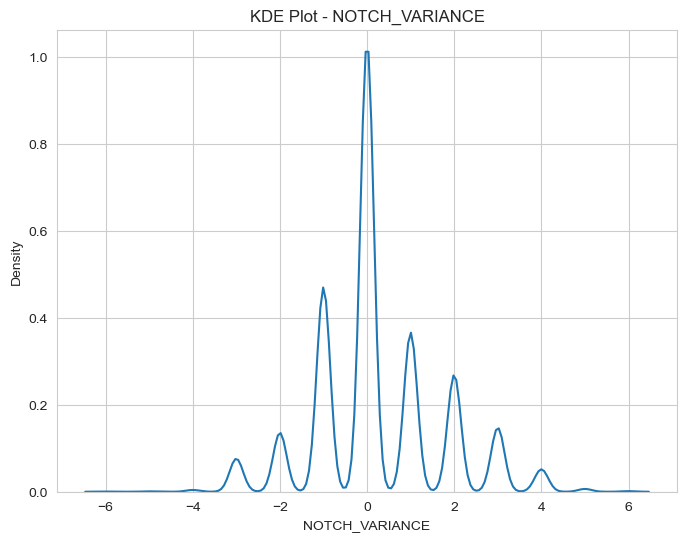

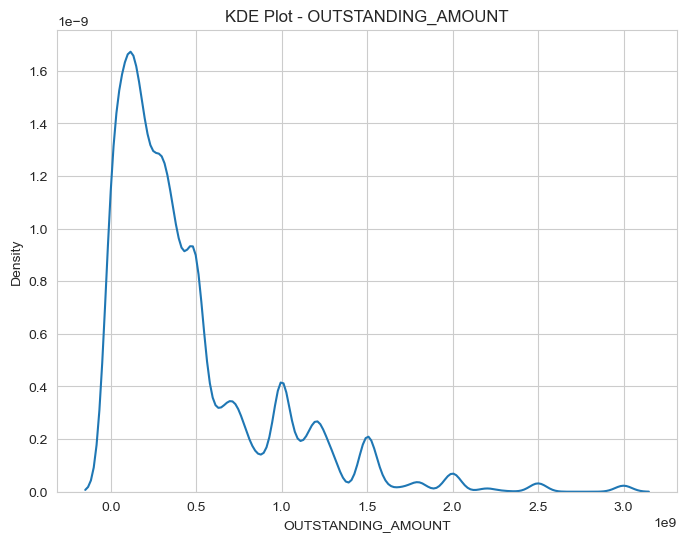

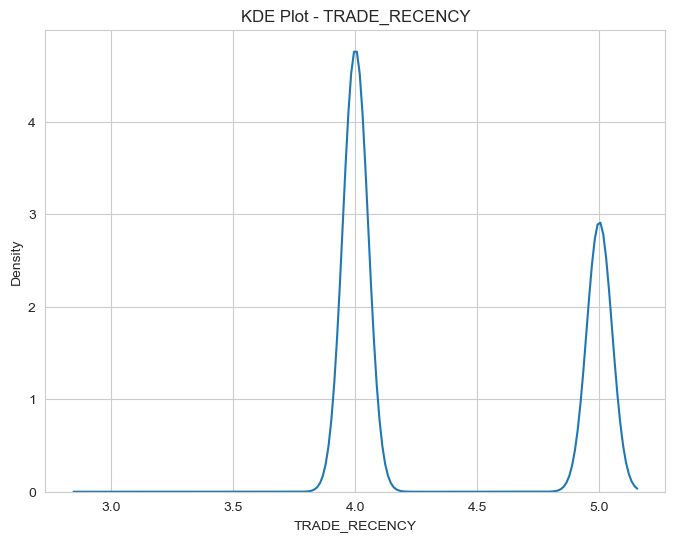

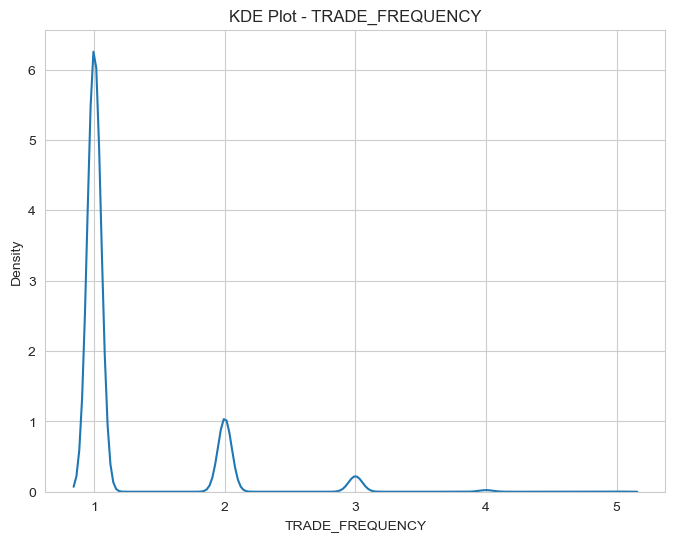

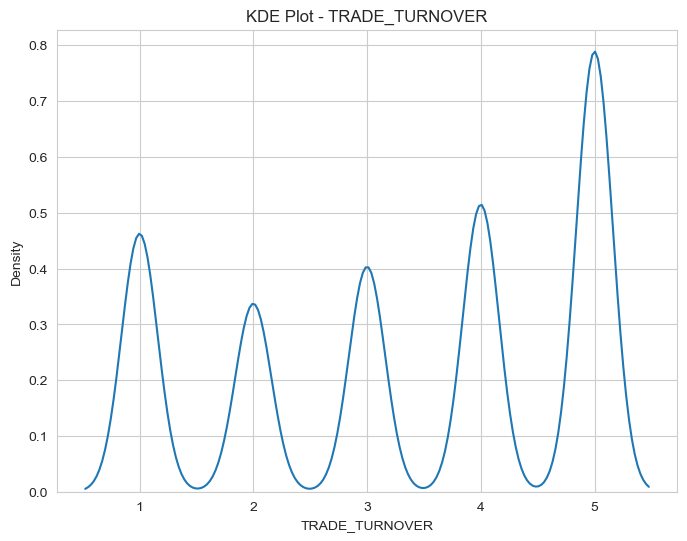

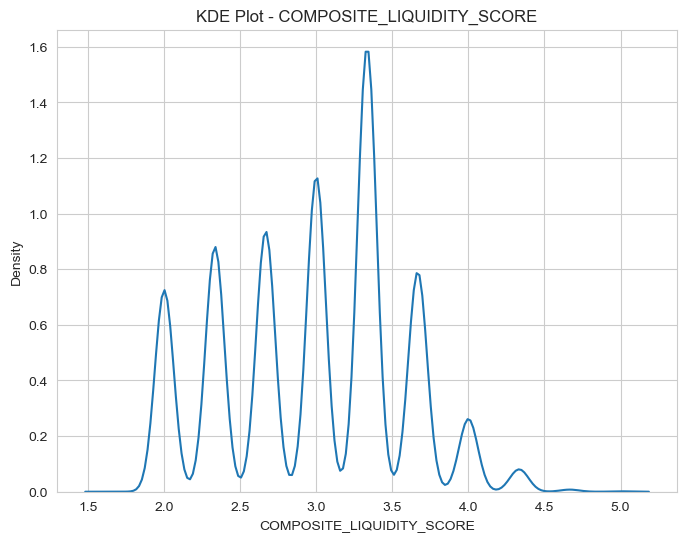

In [21]:
included_df = df[["NOTCH_VARIANCE", "OUTSTANDING_AMOUNT", "TRADE_RECENCY", "TRADE_FREQUENCY", "TRADE_TURNOVER", "COMPOSITE_LIQUIDITY_SCORE"]]
for col in included_df.columns: 
    fig, ax = plt.subplots(figsize = (8, 6))
    
    sns.kdeplot(data = df[col], ax =ax
               )
    
    ax.set_title(f"KDE Plot - {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    
    plt.show()

# Analytics

chosen bond : bond code = VI180294       

In [22]:
chosen_bond_df = df.loc[df["BOND_CODE"] == "VI180294"]
print(chosen_bond_df)

       BASE_DATE BOND_CODE         PROD_CODE                    BOND_NAME  \
72447 2022-04-28  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   
72120 2022-04-29  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   
71801 2022-05-05  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   
71334 2022-05-06  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   
71286 2022-05-09  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   
...          ...       ...               ...                          ...   
37908 2022-10-31  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   
37663 2022-11-01  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   
37550 2022-11-02  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   
36990 2022-11-03  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   
36767 2022-11-04  VI180294  VI18029426102023  PKNS IMTN 5.010% 26.10.2023   

                    FACILITY_NAME                          ISSUER_NAME  \
7

observe the notch variance and composite liquidity score for the chosen bond

In [23]:
plot_df = df[df["BOND_CODE"] == "VI180294"].sort_values(by = ["BASE_DATE"], ascending = True)
plot_df = plot_df[["BASE_DATE", "NOTCH_VARIANCE", "COMPOSITE_LIQUIDITY_SCORE"]]
print(plot_df)

       BASE_DATE  NOTCH_VARIANCE  COMPOSITE_LIQUIDITY_SCORE
72447 2022-04-28               0                    3.66667
72120 2022-04-29               0                    3.66667
71801 2022-05-05               0                    3.33333
71334 2022-05-06               0                    3.33333
71286 2022-05-09               1                    3.33333
...          ...             ...                        ...
37908 2022-10-31               0                    3.33333
37663 2022-11-01               1                    3.33333
37550 2022-11-02               1                    3.33333
36990 2022-11-03               1                    3.33333
36767 2022-11-04               1                    3.33333

[70 rows x 3 columns]


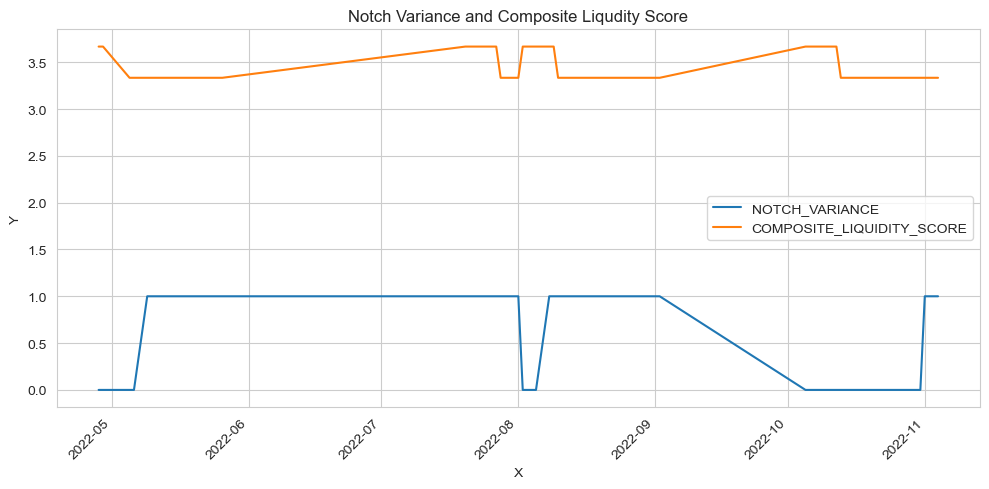

In [24]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_df.plot(x = "BASE_DATE", y = ["NOTCH_VARIANCE", "COMPOSITE_LIQUIDITY_SCORE"], kind = "line", ax = ax)
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(rotation = 45)
plt.title("Notch Variance and Composite Liqudity Score")
plt.tight_layout()
#ax.xaxis.set_major_locator(plt.MaxNLocator(nbins= 10))
plt.show()

observe the correlation between notch variance and composite liquidity score

In [27]:
print(plot_df["NOTCH_VARIANCE"].corr(plot_df["COMPOSITE_LIQUIDITY_SCORE"]))

-0.2825425537701814


small negative correlation